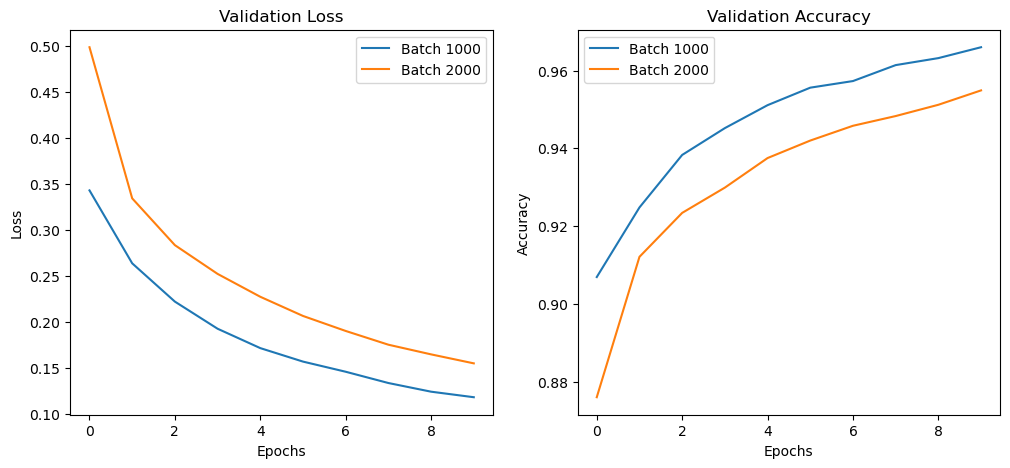

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# Function to train model with different batch sizes
def train_model(batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, 
                        validation_data=(X_test, y_test), verbose=0)
    return history

# Train with different batch sizes
batch_sizes = [1000, 2000]
histories = {bs: train_model(bs) for bs in batch_sizes}

# Plot loss & accuracy curves
plt.figure(figsize=(12, 5))
for i, metric in enumerate(['loss', 'accuracy']):
    plt.subplot(1, 2, i+1)
    for bs in batch_sizes:
        plt.plot(histories[bs].history[f'val_{metric}'], label=f'Batch {bs}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.title(f'Validation {metric.capitalize()}')

plt.show()
